In [ ]:
@time include("airy-sle-rat.jl")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [=====>                                   ]  10.8 %Fetching: [======>                                  ]  13.6 %Fetching: [=======>                                 ]  16.4 %Fetching: [========>                                ]  19.1 %Fetching: [=============>                           ]  31.6 %Fetching: [=============>                           ]  32.1 %Fetching: [=============>                           ]  32.4 %Fetching: [==============>                          ]  32.8 %Fetching: [==============>                          ]  33.1 %Fetching: [==============>                          ]  33.4 %Fetching: [==============>                          ]  33.9 %Fetching: [==============>                          ]  34.5 %Fetching: [===============>                         ]  35.2 %Fetching: [===============>                         ]  36.0 %Fetching: [===============>                         ]  36.6 %Fetching: [============

  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...


In [2]:
eigerrrms

1.0010701888393075e-10

In [1]:
# My first Julia program
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("LinearAlgebra")
using LinearAlgebra;

N         = 2000;
a         = 0;
b         = 50;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
x         = -cos.(pi*n/N);
xsub      = x[2:N];
ysub      = (b-a)/2*xsub.+(a+b)/2;
T         = cos.(acos.(x)*n');
Tsub      = T[2:N,:];
sqx       = -((xsub.^2).-1);
Usub      = Diagonal(((sqx).^(-0.5)))*sin.(acos.(xsub)*n');
dTsub     = Usub * Diagonal(n);
dT        = [(-((-1).^n).*n.^2)'; dTsub; (n.^2)'];
D1        = dT/T;
# Second derivative of T(x) on extrema grid without endpoints
d2Tsubr   = Diagonal(xsub) * Usub - Tsub*Diagonal(n);
d2Tsub    = - Diagonal(((xsub.^2).-1).^(-1))*d2Tsubr*Diagonal(n);
# Second derivative of T(x) on extrema grid with endpoints
d2Top     = (((-1).^n).*(n.^2).*((n.^2).-1)/3)';
d2Tbot    = ((n.^2).*((n.^2).-1)/3)';
d2T       = [d2Top; d2Tsub; d2Tbot];
# Second-order differentiation matrix for extrema grid
D2        = D1*D1;
# Second-order differentiation matrix for extrema grid without endpoints
E1        = D1[2:N,2:N];
E2        = D2[2:N,2:N];
H         = -4/((b-a)^2) * E2 + k * Diagonal(ysub);
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


In [20]:
DD1=dT/T; DD2=DD1^2 ; E2=DD2[2:N,2:N]; H         = -4/((b-a)^2) * E2 + k * Diagonal(ysub);

In [21]:
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

In [2]:
Y=Y[:,sortperm(Lam)];
Lam = sort(Lam);

In [3]:
Lam[1]

2.3381074104595507

 Resolving package versions...


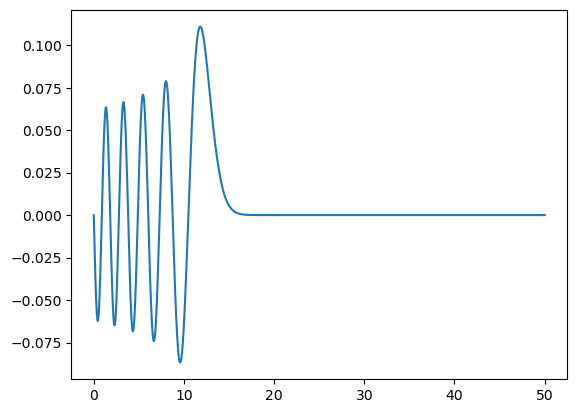

  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6271637630>

In [5]:
Pkg.add("PyPlot")
using PyPlot
PyPlot.plot(ysub,Y[:,10])

In [39]:
EIG.values[660]

511.4851590475714

In [10]:
N         = 10000;
a         = 0;
b         = 50;
L         = 300;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
t         = pi*(n/N.+1);
x         = cos.(t);

MethodError: MethodError: no method matching +(::Irrational{:π}, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::PyCall.PyObject, ::Any) at /home/fusion809/.julia/packages/PyCall/ttONZ/src/pyoperators.jl:13
  +(::Real, !Matched::Complex{Bool}) at complex.jl:291
  ...

In [23]:
ysub      = L*((cot.(t./2)).^2);


In [ ]:
# My first Julia program
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("LinearAlgebra")
using LinearAlgebra;

N         = 10000;
a         = 0;
b         = 50;
L         = 300;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
t         = pi*(n/N.+1);
x         = cos.(t);
xsub      = x[2:N];
y         = L*((cot.(t./2)).^2);
ysub      = y[2:N];
T         = cos.(acos.(x)*n');
Tsub      = T[2:N,:];
sqx       = -((xsub.^2).-1);
Usub      = Diagonal(((sqx).^(-0.5)))*sin.(acos.(xsub)*n');
dTsub     = Usub * Diagonal(n);
dT        = [(-((-1).^n).*n.^2)'; dTsub; (n.^2)'];
dT        = Diagonal(2*L./(((y.+L).^2)))*dT;
D1        = dT/T;
# Second derivative of T(x) on extrema grid without endpoints
d2Tsubr   = Diagonal(xsub) * Usub - Tsub*Diagonal(n);
d2Tsub    = - Diagonal(((xsub.^2).-1).^(-1))*d2Tsubr*Diagonal(n);
# Second derivative of T(x) on extrema grid with endpoints
d2Top     = (((-1).^n).*(n.^2).*((n.^2).-1)/3)';
d2Tbot    = ((n.^2).*((n.^2).-1)/3)';
d2T       = [d2Top; d2Tsub; d2Tbot];
# Second-order differentiation matrix for extrema grid
D2        = D1*D1;
# Second-order differentiation matrix for extrema grid without endpoints
E1        = D1[2:N,2:N];
E2        = D2[2:N,2:N];
H         = -E2 + k * Diagonal(ysub);
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

 Resolving package versions...


In [ ]:
figure(1)
plot(ysub(1:3*N/5), Y(1:3*N/5,1));
figure(2)
plot(ysub(1:3*N/5), Y(1:3*N/5,2));
figure(3)
plot(ysub(1:3*N/5), Y(1:3*N/5,Nfrag))

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...


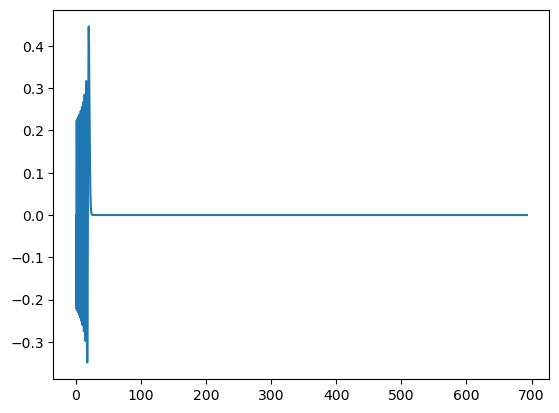

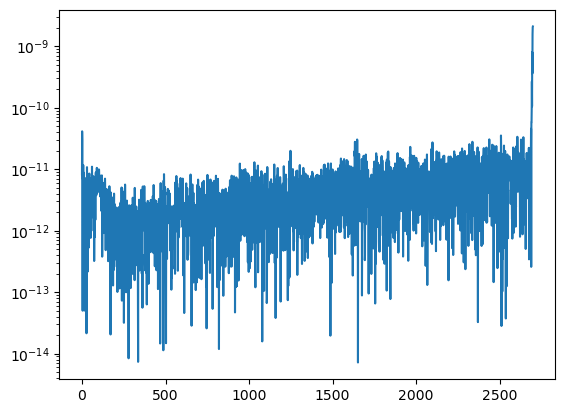

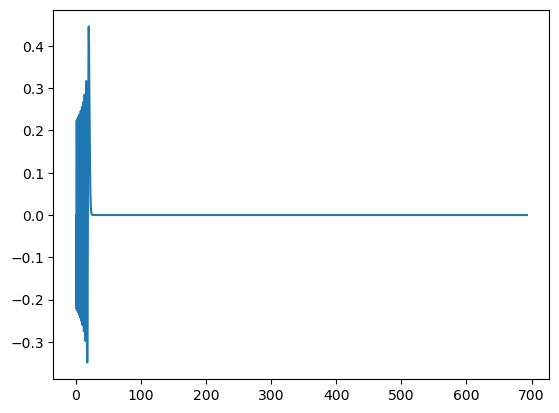

  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe0eca65c88>

In [1]:
include("airy-sle-rat.jl")

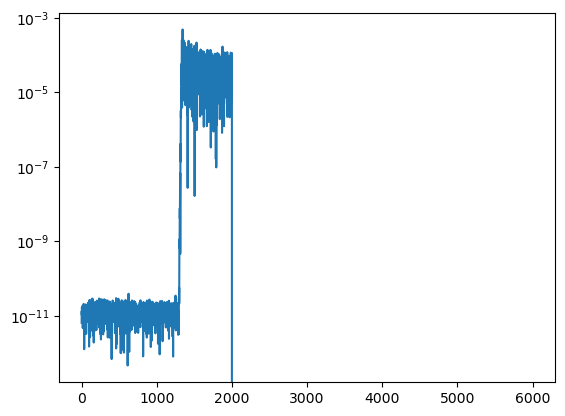

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9a252d40f0>

In [2]:
semilogy(errrms)

In [6]:
errrms[1250]

3.471705184059833e-11

In [23]:
Yexact    = zeros(maxindex,Int(N/10));
errrms = zeros(maxindex,1);
err = zeros(maxindex,Int(N/10));
Ymaxindex = Y[1:maxindex,:];
for i in 1:1:Int(N/10)
    Yexact[:,i] = airyai.(y[1:maxindex].-Lam[i])/airyaiprime(-Lam[i]);
    err[:,i]=abs.(abs.(Yexact[:,i])-abs.(Ymaxindex[:,i]));
    errrms[i,1]=sqrt(err[:,i]'*err[:,i]/maxindex);
end

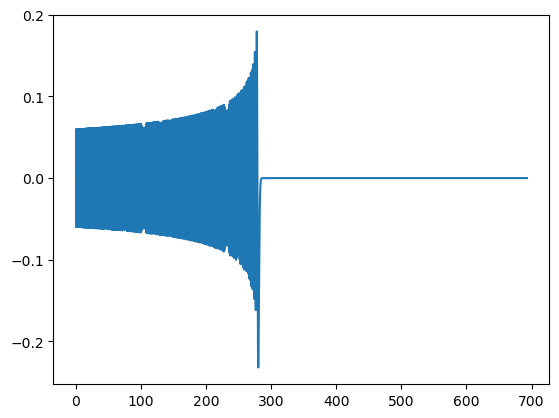

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ee95978>

In [8]:
plot(y[1:maxindex],Yexact[:,Int(N/10)])

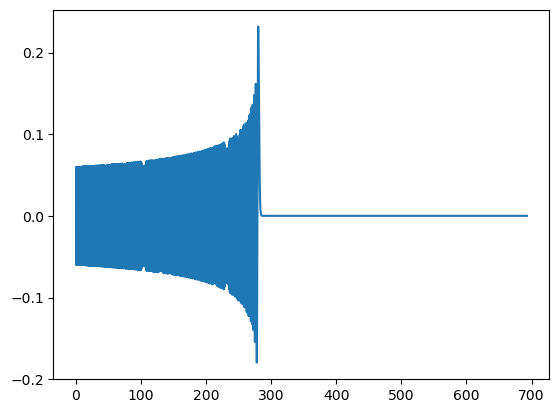

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ee04630>

In [9]:
plot(y[1:maxindex],Y[1:maxindex,Int(N/10)])

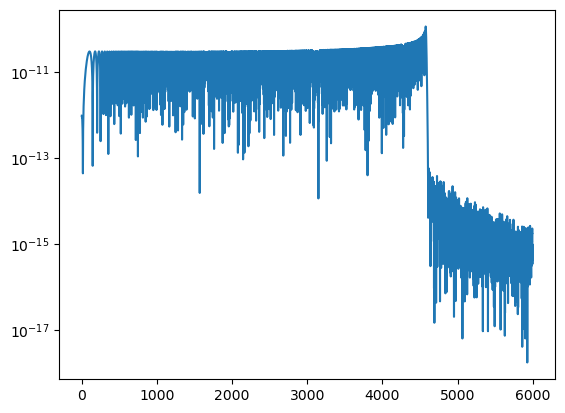

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ee04be0>

In [12]:
semilogy(abs.(Y[1:maxindex,Int(N/10)]+Yexact[:,Int(N/10)]))

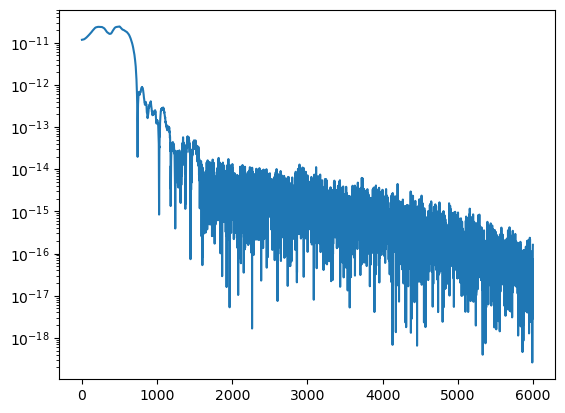

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ec56eb8>

In [14]:
semilogy(abs.(Y[1:maxindex,1]-Yexact[:,1]))

In [15]:
err=abs.(abs.(Y[1:maxindex,1:Int(N/10)])-abs.(Yexact));

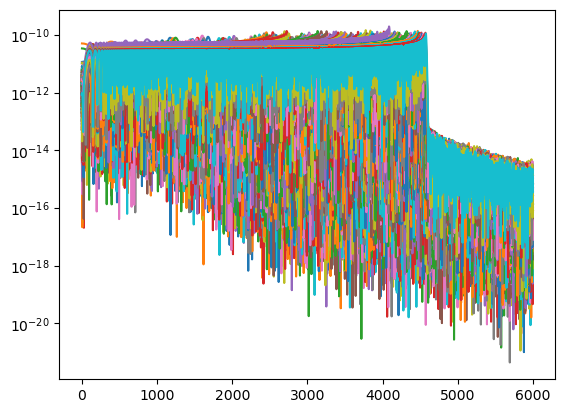

1000-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5eb4a2b0>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77518>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77668>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea777b8>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77908>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77a58>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77ba8>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77cf8>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77e48>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea77f98>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5eb1dba8>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea7a240>
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5ea7a390>
 ⋮                                                          
 PyObject <matplotlib.lines.Line2D object at 0x7f0f5e8f78d0>
 PyObject <matplotlib.lines.Line2D object at 0

In [17]:
errrms1=sqrt(err[:,1]'*err[:,1]/maxindex)

In [24]:
errrms

6000×1 Array{Float64,2}:
 6.516115895356754e-12 
 1.3309524500759483e-11
 1.1690194499005851e-11
 1.0305854844365843e-11
 1.702148328250063e-11 
 1.1663796469016621e-11
 1.2281477028730396e-11
 7.879127611533833e-12 
 1.0942283356750656e-11
 1.2847016279191625e-11
 1.8081955432085032e-11
 1.565009518213497e-11 
 1.786517427352382e-11 
 ⋮                     
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   

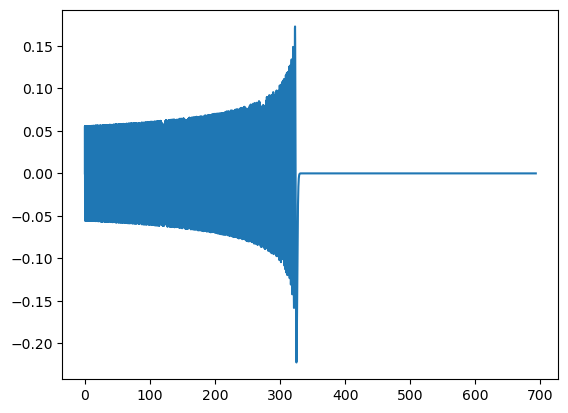

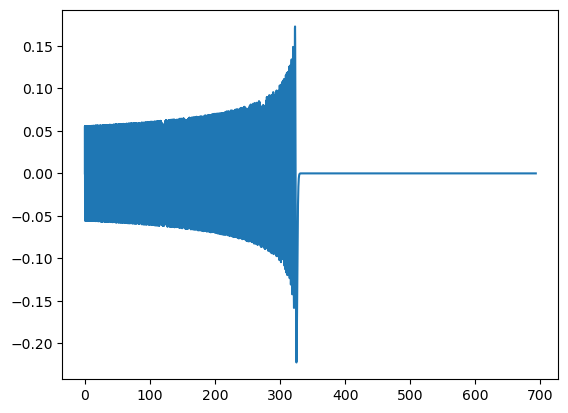

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9906a827f0>

In [14]:
PyPlot.figure(3)
PyPlot.plot(y[1:maxindex],Y[1:maxindex,1250])
PyPlot.figure(4)
PyPlot.plot(y[1:maxindex],Yexact[:,1250])

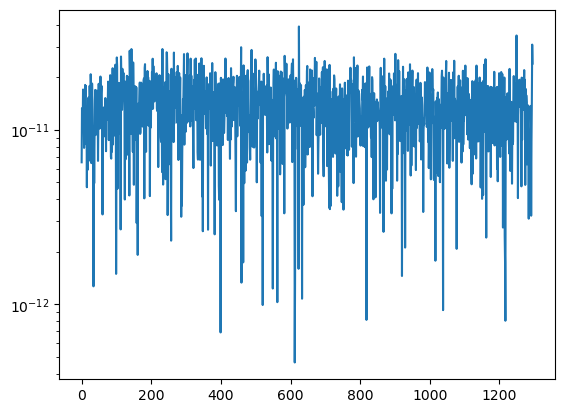

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9906255ba8>

In [24]:
semilogy(errrms[1:1296])

In [ ]:
include("expx-airyaix-sle-rat.jl")

Lam

In [2]:
l

UndefVarError: UndefVarError: l not defined

In [9]:
real(Lam)

9999-element Array{Float64,1}:
   -3.866483091930478e11
   -6.703483992827864e10
   -2.741009427492246e10
   -1.468723059973635e10
   -9.170574297644802e9 
   -6.25161462205358e9  
   -4.539539181109955e9 
   -3.4420277690451055e9
   -2.7011306129342313e9
   -2.1749174944919653e9
   -2.8369930943211303e9
   -1.7894428237118254e9
   -1.4975844187002957e9
    ⋮                   
 -375.6951411178213     
 -443.8584884608584     
 -410.2081867177848     
 -404.19954328079325    
 -415.0980252385589     
 -419.2402893271365     
 -420.75526391663357    
 -428.6218240776896     
 -427.591303502232      
 -424.99496684877715    
 -400.95620709022995    
 -421.7531532135554     

In [10]:
Y         = Y[:, sortperm(real(Lam), rev=true)];
Lam       = sort(real(Lam), rev=true);

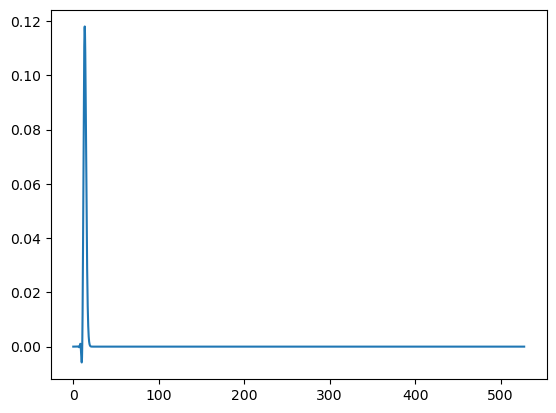

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f71366a7710>

In [6]:
plot(y[1:Int(2*N/5)],Y[1:Int(2*N/5),10])

In [19]:
Lamerr    = abs.(airyai.(Lam[1:Nfrag]));
Lamerrrms = sqrt(Lamerr'*Lamerr/Nfrag)

0.09899614527064378

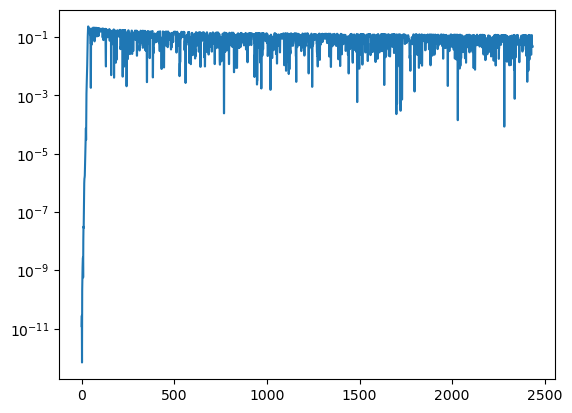

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f71dc51a0f0>

In [2]:
semilogy(Lamerr)

In [4]:
Lamerr[1:100]

100-element Array{Float64,1}:
 1.2120381078928095e-11
 2.7808204556380565e-11
 6.852676957044019e-13 
 2.091609028110956e-10 
 6.144717127412556e-10 
 1.234180309738924e-9  
 1.9088211669268694e-9 
 2.72788475202202e-9   
 5.677400908975824e-10 
 1.065281233406154e-8  
 3.1438685303256294e-8 
 2.8495773328116426e-8 
 1.0264552390281198e-7 
 ⋮                     
 0.20619482993072327   
 0.13497064260329966   
 0.13497064260329966   
 0.11113228217968603   
 0.11113228217968603   
 0.20188304484818542   
 0.20188304484818542   
 0.19685580705099048   
 0.19685580705099048   
 0.1989001430066475    
 0.1989001430066475    
 0.17669616041389843   